<a href="https://colab.research.google.com/github/is-ghufran/X_sentiment_analysis/blob/main/yahoo_stck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math


In [ ]:
# Fetch historical data for Apple Inc. (AAPL) from Yahoo Finance
df = yf.download('AAPL', start='2010-01-01', end='2024-08-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df = df[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

In [ ]:
# Split data into training and test sets
n_steps = 100
training_size = int(len(df_scaled) * 0.65)
test_size = len(df_scaled) - training_size
train_data, test_data = df_scaled[:training_size], df_scaled[training_size:]


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Predicting the 'Close' price
    return np.array(dataX), np.array(dataY)


In [ ]:
# Prepare training and test datasets
X_train, y_train = create_dataset(train_data, n_steps)
X_test, y_test = create_dataset(test_data, n_steps)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - loss: 6.4030e-05 - val_loss: 0.0015
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - loss: 4.2226e-05 - val_loss: 0.0011
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - loss: 4.2036e-05 - val_loss: 0.0013
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - loss: 3.8519e-05 - val_loss: 0.0018
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 3.6054e-05 - val_loss: 0.0022
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - loss: 3.5627e-05 - val_loss: 0.0023
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 3.3079e-05 - val_loss: 0.0019
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 3.2372e-05 - val_loss: 0.0023
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 3.0983e-05 - val_loss: 0.0024
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 3.6931e-05 - val_loss: 0.003

In [ ]:
x_input = test_data[-n_steps:].reshape(1, n_steps, 1)
temp_input = list(x_input.flatten())
lst_output = []

In [ ]:
for i in range(30):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())

In [ ]:
# Convert lst_output to a numpy array and inverse transform to original scale
lst_output = np.array(lst_output).reshape(-1, 1)
lst_output = scaler.inverse_transform(lst_output)

In [ ]:
# Prepare data for plotting
day_new = np.arange(1, n_steps + 1)
day_pred = np.arange(n_steps + 1, n_steps + 31)


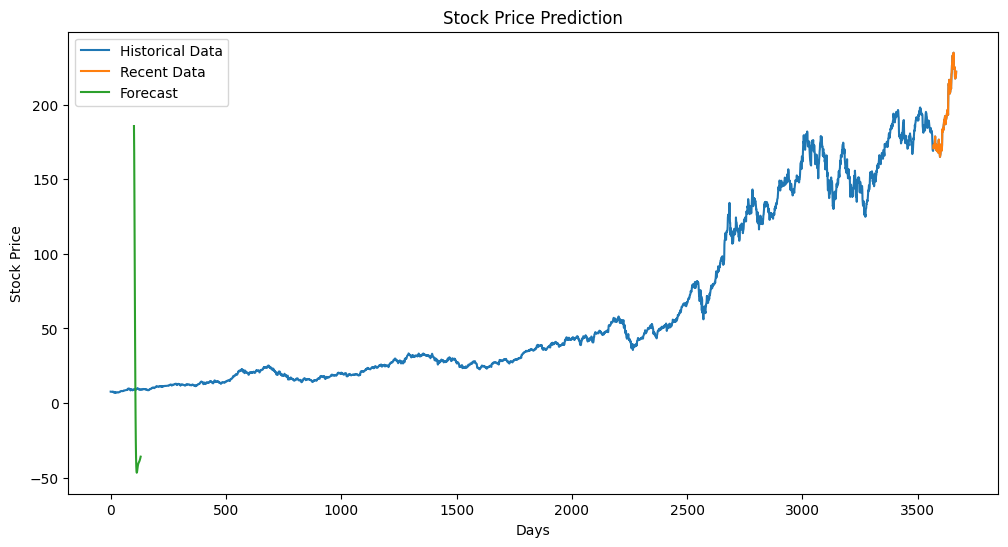

In [ ]:
# Plot historical data, recent data, and forecast
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(df_scaled)), scaler.inverse_transform(df_scaled), label='Historical Data')
plt.plot(np.arange(len(df_scaled) - n_steps, len(df_scaled)), scaler.inverse_transform(df_scaled[-n_steps:]), label='Recent Data')
plt.plot(day_pred, lst_output, label='Forecast')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.show()

In [ ]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 29.135758078864992
Test RMSE: 134.65721482347718


In [ ]:
print(lst_output)

[[185.66497861]
 [168.11078847]
 [138.65801754]
 [104.69172428]
 [ 70.51292191]
 [ 38.93630991]
 [ 11.87198971]
 [ -9.65695729]
 [-25.47760333]
 [-36.10755297]
 [-42.48771103]
 [-45.6949749 ]
 [-46.73574983]
 [-46.44517351]
 [-45.45943491]
 [-44.224562  ]
 [-43.02146693]
 [-41.9977172 ]
 [-41.20211244]
 [-40.61775994]
 [-40.19136937]
 [-39.8564773 ]
 [-39.5498507 ]
 [-39.22139912]
 [-38.83817616]
 [-38.38447804]
 [-37.85893241]
 [-37.27064632]
 [-36.63479705]
 [-35.96907557]]


[*********************100%%**********************]  1 of 1 completed


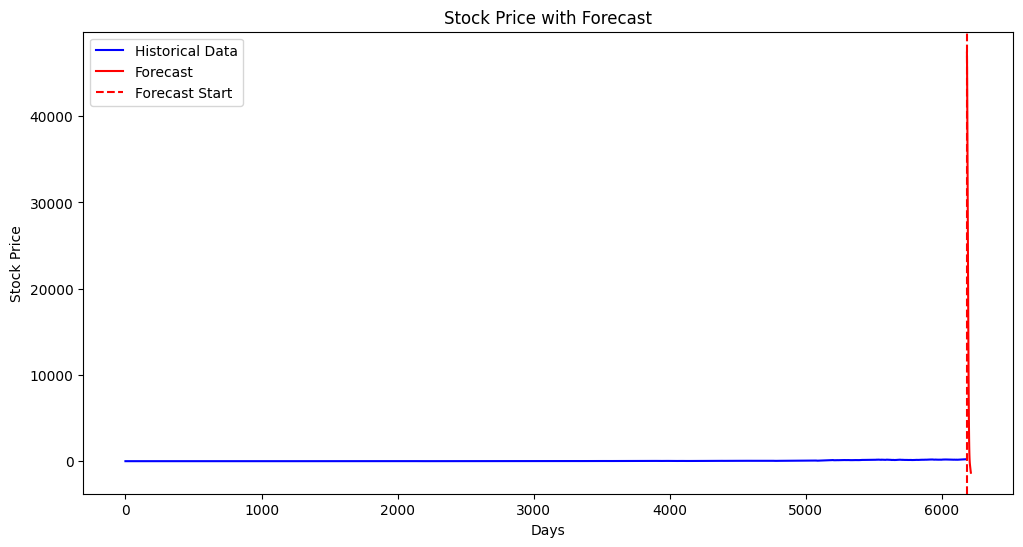

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Load historical data
df = yf.download('AAPL', start='2000-01-01', end='2024-08-01')  # Specify the date range
df.to_csv('AAPL.csv')

# Read data from CSV
df = pd.read_csv('AAPL.csv')
df = df[['Date', 'Close']]  # Keep only the date and close price columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare the data
df1 = df['Close'].values
df1 = df1.reshape(-1, 1)  # Reshape for scaling

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

# Define your lst_output forecasted data here
lst_output = np.array([
    [ 2.01851760e+02], [ 1.94875346e+02], [ 1.83065818e+02],
    [ 1.69148116e+02], [ 1.54228223e+02], [ 1.38874059e+02],
    [ 1.23510262e+02], [ 1.08462803e+02], [ 9.39406927e+01],
    [ 8.00488335e+01], [ 6.68397889e+01], [ 5.43862794e+01],
    [ 4.28435800e+01], [ 3.24635528e+01], [ 2.35318672e+01],
    [ 1.62487390e+01], [ 1.06317064e+01], [ 6.50938080e+00],
    [ 3.59547572e+00], [ 1.57782510e+00], [ 1.76661932e-01],
    [-8.32032386e-01], [-1.61365048e+00], [-2.28038932e+00],
    [-2.89964651e+00], [-3.50352430e+00], [-4.09864663e+00],
    [-4.67548692e+00], [-5.21657329e+00], [-5.70301569e+00]
])

# Extend the forecasted data to the original scale
lst_output = scaler.inverse_transform(lst_output)

# Combine historical and forecasted data
df1_original = scaler.inverse_transform(df1).flatten()
df3 = df1_original.tolist()
df3.extend(lst_output.flatten())

# Define new indices for plotting
day_new = np.arange(len(df1_original))
day_pred = np.arange(len(df1_original), len(df1_original) + len(lst_output))

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(day_new, df1_original, label='Historical Data', color='blue')
plt.plot(day_pred, lst_output.flatten(), label='Forecast', color='red')
plt.axvline(x=len(df1_original), color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price with Forecast')
plt.legend()
plt.show()
